## make semi supervised

In [110]:
from collections import Counter

#autoreload
%load_ext autoreload
%autoreload 2
#output
from bokeh.plotting import output_notebook
output_notebook()
from anndata import AnnData, read_h5ad

import scanpy as sc
import torch
import matplotlib.pyplot as plt
import numpy as np

import celligner2
from celligner2 import plotting as pl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Loading BokehJS ...

In [3]:
sc.settings.set_figure_params(dpi=500, frameon=False)
sc.set_figure_params(dpi=500)
sc.set_figure_params(figsize=(10, 10))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [108]:
cl2_less = celligner2.CELLIGNER2.load("temp/subdataset_trial2_noclass", adata=dataset[dataset.obs.dataset.isin(['ccle', 'tcga', 'cclf'])])

AnnData object with n_obs × n_vars = 13680 × 3000
    obs: 'collection_site', 'disease_type', 'doublingt', 'method', 'reference', 'age', 'cell_type', 'ends', 'sequencer', 'participant_id', 'sex', 'base_media', 'morphology', 'dataset', 'ethnicity', 'instability', 'hasebv', 'tissue_id', 'sample_type', 'align', 'counter', 'passage_number', 'contamination', 'lineage', 'stage', 'conservation', 'cell_format'
dict_keys(['apply_log_', 'beta_', 'betaclass_', 'classifier_hidden_layer_sizes_', 'condition_keys_', 'condition_set_', 'conditions_', 'dr_rate_', 'hidden_layer_sizes_', 'input_dim_', 'is_trained_', 'latent_dim_', 'main_dataset_', 'mask_', 'miss_', 'mmd_boundary_', 'mmd_on_', 'predictor_keys_', 'predictor_set_', 'predictors_', 'recon_loss_', 'soft_mask_', 'use_bn_', 'use_ln_', 'use_mmd_', 'use_own_kl_'])

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 3000 256 3
	Hidden Layer 1 in/out: 256 128
	Mean/Var Layer in/out: 128 16
Classifier Architect

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/torch/nn/init.py:388: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [120]:
evaluator.adata_latent.obs['lineage'] = evaluator.adata_latent.obs['lineage'].astype(str)

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'lineage' as categorical


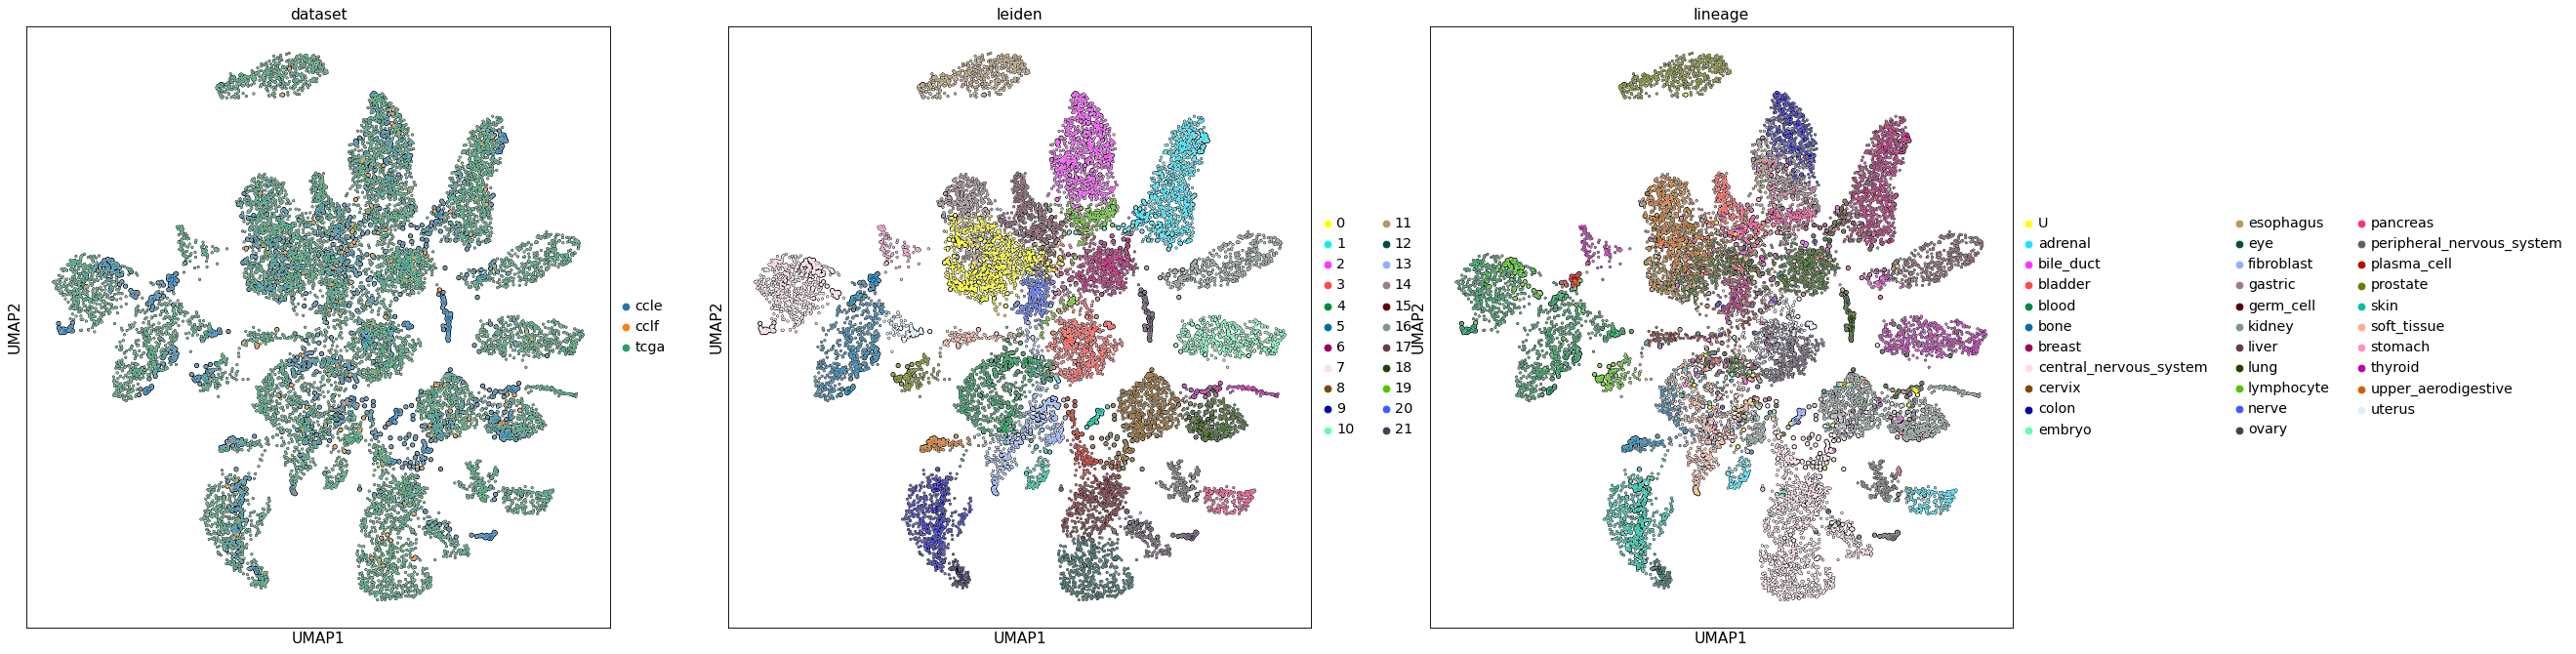

In [121]:
evaluator.plot_latent(umap_kwargs=dict( 
                            n_components=2,
                            min_dist=0.5,
                            alpha=1,
                            spread=1,
                            random_state=None), 
        color=['dataset', 'leiden', 'lineage'],
        projection="2d",
        add_outline=True,
        #rerun=False,
        size=[30 if i != 'tcga' else 10 for i in  evaluator.adata_latent.obs['dataset']])

In [126]:
cat, counts = evaluator.define_clusters()

In [128]:
counts

{'32': Counter({'eye': 74, 'lung': 1, 'skin': 5}),
 '10': Counter({'bile_duct': 1,
          'lung': 5,
          'ovary': 4,
          'central_nervous_system': 1,
          'cervix': 1,
          'thyroid': 513,
          'kidney': 2}),
 '8': Counter({'soft_tissue': 9,
          'kidney': 506,
          'central_nervous_system': 50,
          'bone': 2,
          'ovary': 4,
          'thyroid': 5,
          'bile_duct': 1,
          'lung': 5,
          'skin': 3,
          'liver': 3,
          'peripheral_nervous_system': 1,
          'upper_aerodigestive': 1,
          'gastric': 1,
          'bladder': 1,
          'fibroblast': 1,
          'breast': 1,
          'U': 4}),
 '23': Counter({'peripheral_nervous_system': 165,
          'bone': 1,
          'lung': 2,
          'gastric': 2,
          'central_nervous_system': 1,
          'pancreas': 8,
          'adrenal': 4}),
 '5': Counter({'blood': 587,
          'plasma_cell': 27,
          'lymphocyte': 10,
          'soft_ti

In [127]:
cat

{'32': 'eye',
 '10': 'thyroid',
 '8': 'kidney',
 '23': 'peripheral_nervous_system',
 '5': 'blood',
 '19': 'pancreas+gastric',
 '7': 'blood_2',
 '18': 'kidney_2',
 '22': 'adrenal',
 '28': 'thyroid_2',
 '1': 'breast',
 '27': 'germ_cell',
 '21': 'central_nervous_system',
 '11': 'prostate',
 '6': 'lung',
 '2': 'colon+gastric',
 '29': 'kidney_3',
 '15': 'central_nervous_system_2',
 '0': 'lung+upper_aerodigestive',
 '13': 'soft_tissue+kidney',
 '24': 'central_nervous_system_3',
 '20': 'breast_2',
 '26': 'fibroblast+adrenal',
 '3': 'uterus+ovary',
 '12': 'central_nervous_system_4',
 '14': 'upper_aerodigestive',
 '30': 'bone',
 '4': 'soft_tissue+bone',
 '17': 'bladder',
 '9': 'skin',
 '25': 'lymphocyte',
 '31': 'blood_3',
 '16': 'liver'}

In [ ]:
## get dependencies files and do distplot of cluster 13, 4 vs rest of dependencies HNF4A, SPDEF, FOXA1, TCF7L2, PAX8, SOX10, ISL1 and limma or similar diff expr analysis (diffxpy?)

In [66]:
import seaborn as sns
from matplotlib import pyplot as plt

In [60]:
from taigapy import TaigaClient
tc = TaigaClient()
gene_effect = tc.get(name='depmap-a0ab', file='Achilles_gene_effect_CERES')

No dataset version provided. Using version 116.


[##################]100% |  44.2 MiB/s | 142.1 MiB / 142.1 MiB | Time:  0:00:03


In [63]:
gene_effect.columns = [i.split(' (')[0] for i in gene_effect.columns]

In [69]:
ccle = obs.loc[set(obs.index) & set(gene_effect.index)]
emt_ccle = ccle[ccle.leiden.isin(['4','13'])].index

<ipython-input-69-4326cd37d337>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ccle = obs.loc[set(obs.index) & set(gene_effect.index)]


<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

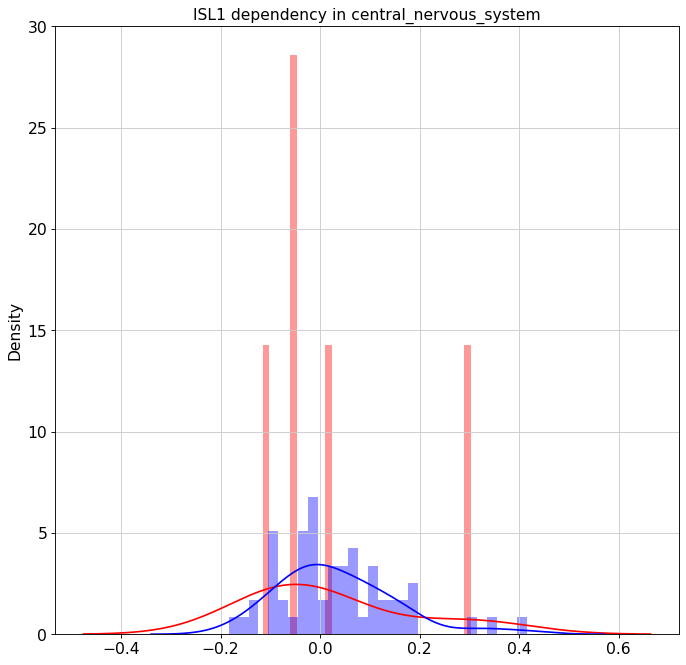

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

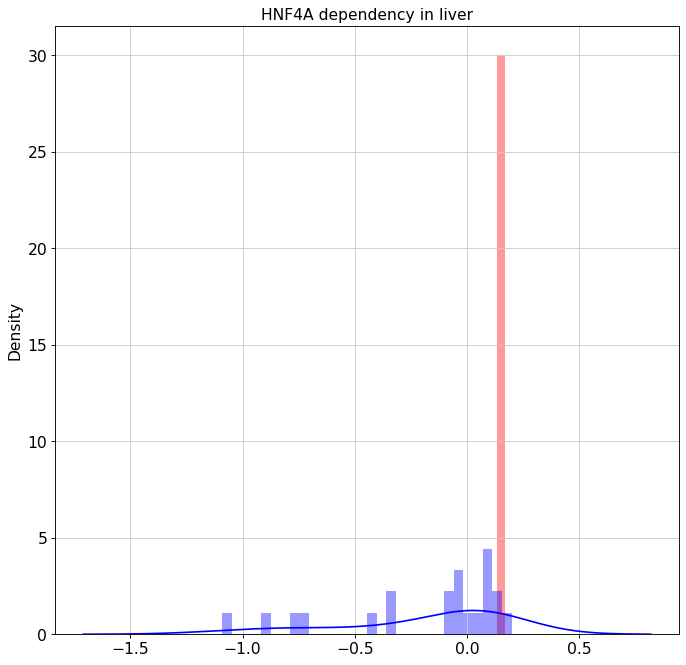

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

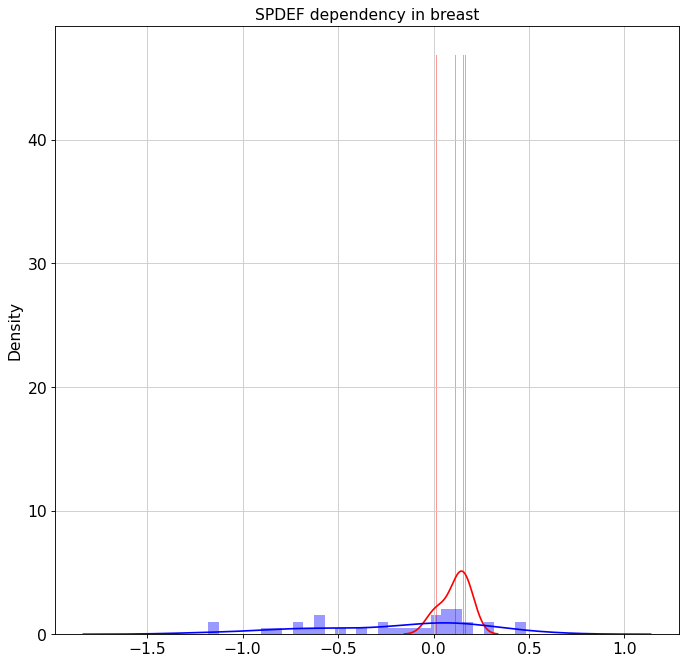

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

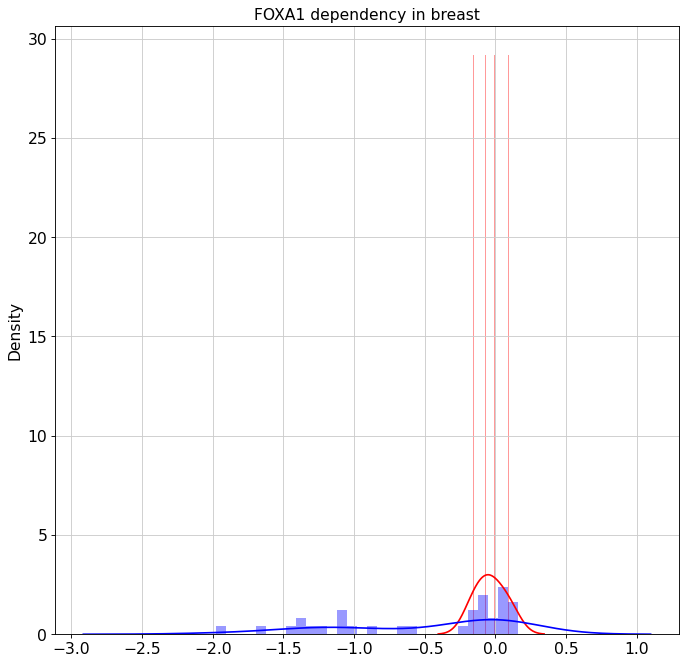

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

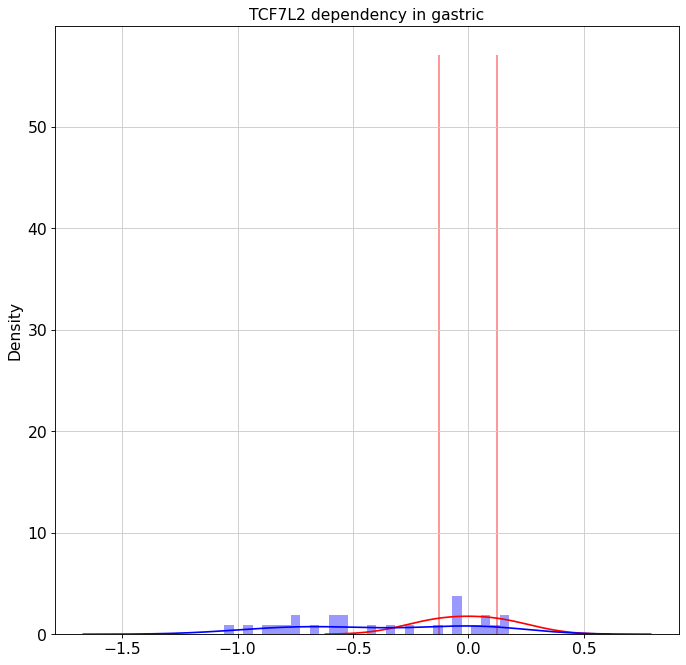

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

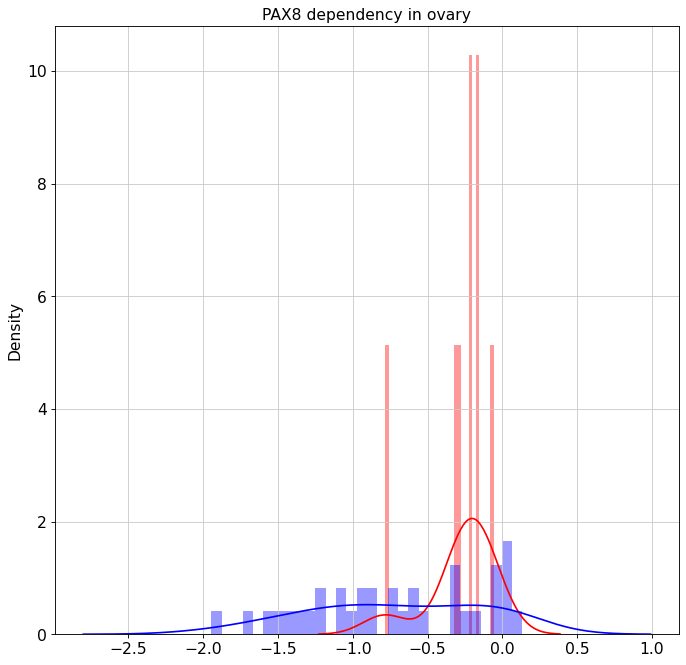

<ipython-input-130-0a4747004dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lo['col'] = 'blue'
<ipython-input-130-0a4747004dc3>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
<ipython-input-130-0a4747004dc3>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either

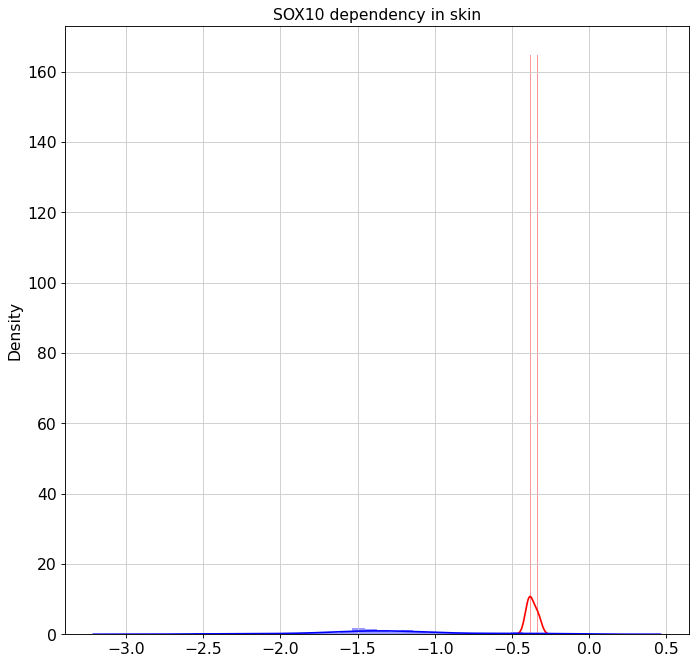

In [130]:
for val, lin in [("ISL1", "central_nervous_system"), ("HNF4A", 'liver'), ("SPDEF","breast"), ("FOXA1",'breast'), ("TCF7L2",'gastric'), ("PAX8",'ovary'), ("SOX10",'skin')]:
    lo = gene_effect[[val]]
    lo['col'] = 'blue'
    lo = lo.loc[ccle[ccle.lineage==lin].index]
    lo.loc[set(emt_ccle)&set(lo.index), 'col'] = 'red'
    sns.distplot(x = lo.loc[set(emt_ccle)&set(lo.index)][val], color="red", bins=30)
    sns.distplot(x=lo.loc[set(lo.index)-set(emt_ccle)][val], color='blue', bins=30)
    plt.title(val+ " dependency in "+lin)
    plt.show()